# Setup

Azure Data studio will detect the intended Kernal and have you approve the python installation. This install is necessary for this notebook to work as expected.

## Python App Setup:

Step 1: Install the pre-requisites using the shell-escape in Python:

In [1]:
!python -m pip install -U pip
!python -m pip install pyodbc

  Attempting uninstall: pip
    Found existing installation: pip 21.1.1
    Uninstalling pip-21.1.1:
      Successfully uninstalled pip-21.1.1


     -------------------------------------- 75.1/75.1 kB 275.9 kB/s eta 0:00:00


Step 2: Import Python ODBC driver for SQL.

In [13]:
import pyodbc 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};Server=(local);Database=master;Trusted_Connection=yes;Application Name=DBConnectionAppFromPython;')
cursor = cnxn.cursor()
print ('Complete')

Complete


Step 3: Test connection to SQL Server

In [7]:
cursor = cnxn.cursor()
# Connect and return version information
cursor.execute("SELECT @@version;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

Microsoft SQL Server 2019 (RTM) - 15.0.2000.5 (X64) 
	Sep 24 2019 13:48:23 
	Copyright (C) 2019 Microsoft Corporation
	Enterprise Edition (64-bit) on Windows Server 2022 Datacenter 10.0 <X64> (Build 20348: ) (Hypervisor)



# Module 2 : Python App Examples

## 2.1 Principals

Activity 1 Step 2: Create Windows users

In [3]:
#  Module 2, Activity 1 - Create Windows users #
!net user User1 "Tes#20. Use12!" /add
!net user User2 "Tes#20. Use22!" /add

The command completed successfully.



The command completed successfully.



## 2.1.1 Roles

Activity 2 Step 5: Declare user specific conenciton variables and the queries to be run:

In [34]:
#  Module 2, Activity 2 - Add connection and query details #

# ---------------------------- #
# Declare connection variables #
# ---------------------------- #
string = 'DRIVER={ODBC Driver 17 for SQL Server};Server=(local);DATABASE=SQLSecurityTest;'
user3 = 'User3'
pw3 = 'Tes#20. Use32!'
user4 = 'User4'
pw4 = 'Tes#20. Use42!'

# -------------------------------------------------- #
# Declare the queries you want to test for each user #
# -------------------------------------------------- #

query1 = "SELECT 'Connecting user name = ' + suser_name()"
query2 = "SELECT 'Select Server Name = ' + @@SERVERNAME"
query3 = "Select 'Test Database = ' + name FROM SYS.Databases WHERE name LIKE '%Security%'"
query4 = "Select 'SQL Version = ' + @@VERSION"

# ---------------------------------------- #
# Declare connection strings for each user # 
# ---------------------------------------- #

conn1 = pyodbc.connect(string+'Trusted_Connection=yes;')
conn2 = pyodbc.connect(string+'UID='+ user3 +';PWD=' + pw3)
conn3 = pyodbc.connect(string+'UID='+ user4 +';PWD=' + pw4)
cursor1 = conn1.cursor()
cursor2 = conn2.cursor()
cursor3 = conn3.cursor()

print ('Complete')

Complete


Activity 2 Step 5, contd: Test connection of current user (logged in user) as well as the two SQL users; User3 and User4. We would need to log in as User1 and User2 to use the trusted connection capabilities of the ODBC driver.

In [35]:
#  Module 2, Activity 2 - Test Connectivity to SQL Server for 3/5 users #

# ------------------------------------ #
# This will run as the powershell user #
# ------------------------------------ #

cursor1.execute(query1)
row = cursor1.fetchone() 
while row: 
    print(row[0])
    row = cursor1.fetchone()
cursor1.execute(query2)
row = cursor1.fetchone() 
while row: 
    print(row[0])
    row = cursor1.fetchone()
# ----------------------------- #
# Execute the Queries for User3 #
# ----------------------------- #

cursor2.execute(query1)
row = cursor2.fetchone() 
while row: 
    print(row[0])
    row = cursor2.fetchone()
cursor2.execute(query3)
row = cursor2.fetchone() 
while row: 
    print(row[0])
    row = cursor2.fetchone()

# ----------------------------- #
# Execute the queries for User4 #
# ----------------------------- #

cursor3.execute(query1)
row = cursor3.fetchone() 
while row: 
    print(row[0])
    row = cursor3.fetchone()
cursor3.execute(query4)
row = cursor3.fetchone() 
while row: 
    print(row[0])
    row = cursor3.fetchone()


Connecting user name = A1\Administrator
Select Server Name = A1
Connecting user name = User3
Test Database = SQLSecurityTest
Connecting user name = User4
SQL Version = Microsoft SQL Server 2019 (RTM) - 15.0.2000.5 (X64) 
	Sep 24 2019 13:48:23 
	Copyright (C) 2019 Microsoft Corporation
	Enterprise Edition (64-bit) on Windows Server 2022 Datacenter 10.0 <X64> (Build 20348: ) (Hypervisor)



## 2.2 Securables

### Activity 3 Step 7: Test Connections with changed permissions

In [80]:
# Declare the new queries #

# -------------------------------------------------- #
# Declare the queries you want to test for each user #
# -------------------------------------------------- #

query5 = "EXEC dbo.uspGetCardInformation @LoginID = 2"
query6 = "SELECT FirstName + ' ' + Lastname + ' ' + Address + ' ' + City FROM Patient_Mailing_Address"
query7 = "SELECT FirstName + ' ' + LastName +', ' + SSN FROM Patient" #this could be any combination of columns


print ('Complete')

Complete


### Administrator: full permission on all objects as sysadmin:

In [81]:
# ------------------------------------ #
# This will run as the powershell user #
# ------------------------------------ #

print ('--Credit Card Information--')
cursor1.execute(query5)
row = cursor1.fetchone() 
while row: 
    print(row[0])
    row = cursor1.fetchone()

--Credit Card Information--
2


In [82]:
# ------------------------------------ #
# This will run as the powershell user #
# ------------------------------------ #
print ('--Address information--')
cursor1.execute(query6)
row = cursor1.fetchone() 
while row: 
    print(row[0])
    row = cursor1.fetchone()

--Address information--
Agatha Arbiter 111 Apple Ave. Atlanta
Billy Bob 222 Bayshore Blvd. Boice
Charley Choice 333 Castaway Ct. Chesterfield
David Dangerfield 4444 Denvue Drive Denver
Edbert Engleton 5555 Esquire Rd. E Easton


In [83]:
# ------------------------------------ #
# This will run as the powershell user #
# ------------------------------------ #
print ('--Social Security Information--')
cursor1.execute(query7)
row = cursor1.fetchone() 
while row: 
    print(row[0])
    row = cursor1.fetchone()

--Social Security Information--
Agatha Arbiter, 111-11-1111
Billy Bob, 222-22-2222
Charley Choice, 333-33-3333
David Dangerfield, 444-44-4444
Edbert Engleton, 555-55-5555


### User3:  Only permission to execute the stored procedure

In [84]:
# ----------------------------- #
# Execute the Queries for User3 #
# ----------------------------- #

print ('--Credit Card Information--')
cursor2.execute(query5)
row = cursor2.fetchone() 
while row: 
    print(row[0])
    row = cursor2.fetchone()

--Credit Card Information--
2


In [85]:
# ----------------------------- #
# Execute the Queries for User3 #
# ----------------------------- #
print ('--Address information--')
cursor2.execute(query6)
row = cursor2.fetchone() 
while row: 
    print(row[0])
    row = cursor2.fetchone()

--Address information--


ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The SELECT permission was denied on the object 'Patient_Mailing_Address', database 'SQLSecurityTest', schema 'dbo'. (229) (SQLExecDirectW)")

In [86]:
# ----------------------------- #
# Execute the Queries for User3 #
# ----------------------------- #
print ('--Social Security Information--')
cursor2.execute(query7)
row = cursor2.fetchone() 
while row: 
    print(row[0])
    row = cursor2.fetchone()

--Social Security Information--


ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The SELECT permission was denied on the object 'Patient', database 'SQLSecurityTest', schema 'dbo'. (229) (SQLExecDirectW)")

### User4: Only permission to access the view!

In [87]:
# ----------------------------- #
# Execute the queries for User4 #
# ----------------------------- #
print ('--Credit Card Information--')
cursor3.execute(query5)
row = cursor3.fetchone() 
while row: 
    print(row[0])
    row = cursor3.fetchone()

--Credit Card Information--


ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The EXECUTE permission was denied on the object 'uspGetCardInformation', database 'SQLSecurityTest', schema 'dbo'. (229) (SQLExecDirectW)")

In [88]:
# ----------------------------- #
# Execute the queries for User4 #
# ----------------------------- #
print ('--Address information--')
cursor3.execute(query6)
row = cursor3.fetchone() 
while row: 
    print(row[0])
    row = cursor3.fetchone()

--Address information--
Agatha Arbiter 111 Apple Ave. Atlanta
Billy Bob 222 Bayshore Blvd. Boice
Charley Choice 333 Castaway Ct. Chesterfield
David Dangerfield 4444 Denvue Drive Denver
Edbert Engleton 5555 Esquire Rd. E Easton


In [89]:
# ----------------------------- #
# Execute the queries for User4 #
# ----------------------------- #
print ('--Social Security Information--')
cursor3.execute(query7)
row = cursor3.fetchone() 
while row: 
    print(row[0])
    row = cursor3.fetchone()

--Social Security Information--


ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The SELECT permission was denied on the object 'Patient', database 'SQLSecurityTest', schema 'dbo'. (229) (SQLExecDirectW)")

Return to the 'Security Audit Notebook' To review these results:  
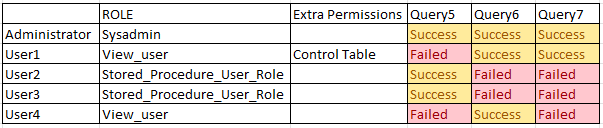